# Тема проекта ""

Изучение покупок и предпочтений клиентов в магазинах.

# Описание проекта

Этот проект направлен на анализ данных о продажах в магазинах, чтобы понять какие товары являются популярными у покупателей. Предоставлена такая информация, как категория товаров, местоположение магазинов и характеристики клиентов.

# Цели и задачи проекта

Цель:
1. Определить ключевые факторы, влияющие на объем продаж в разных магазинах.
2. Выявить предпочтения клиентов.
3. Разработать рекомендации по оптимизации ассортимента продуктов и ценовой политики на основе анализа данных.


Задачи:
1. Провести предварительный анализ данных для оценки их качества и структуры.
2. Создать визуализации, чтобы лучше увидеть результаты анализа.
3. Разработать отчет с рекомендациями для руководства по улучшению продаж и клиентского обслуживания.


# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#Сброс ограничений на количество выводимых столбцов.
pd.set_option('display.max_columns', None)

In [4]:
#Установка единообразного отображения вещественных чисел с двумя знаками после запятой.
pd.set_option('display.float_format', '{:,.2f}'.format)

In [5]:
#первые строки
market = pd.read_csv('archive.zip')
market.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.30


In [ ]:
#последние строки
market.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.02,42.37,1/29/2019,13:46,Ewallet,40.35,4.76,2.02,6.20
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.69,"1,022.49",3/2/2019,17:16,Ewallet,973.80,4.76,48.69,4.40
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.59,33.43,2/9/2019,13:22,Cash,31.84,4.76,1.59,7.70
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.29,69.11,2/22/2019,15:33,Cash,65.82,4.76,3.29,4.10
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.92,649.30,2/18/2019,13:28,Cash,618.38,4.76,30.92,6.60


In [ ]:
market.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
424,489-64-4354,C,Naypyitaw,Normal,Male,Fashion accessories,16.28,1,0.81,17.09,3/9/2019,15:36,Cash,16.28,4.76,0.81,5.00
577,592-34-6155,C,Naypyitaw,Normal,Male,Food and beverages,31.77,4,6.35,133.43,1/14/2019,14:43,Ewallet,127.08,4.76,6.35,6.20
974,744-82-9138,C,Naypyitaw,Normal,Male,Fashion accessories,86.13,2,8.61,180.87,2/7/2019,17:59,Cash,172.26,4.76,8.61,8.20
925,226-34-0034,B,Mandalay,Normal,Female,Electronic accessories,13.78,4,2.76,57.88,1/10/2019,11:10,Ewallet,55.12,4.76,2.76,9.00
251,662-47-5456,C,Naypyitaw,Member,Male,Fashion accessories,35.19,10,17.59,369.50,3/17/2019,19:06,Credit card,351.90,4.76,17.59,8.40


In [6]:
market.drop(labels = 'Rating', axis = 1, inplace = True)
market.drop(labels = 'gross margin percentage', axis = 1, inplace = True)
market.drop(labels = 'cogs', axis = 1, inplace = True)
market.drop(labels = 'gross income', axis = 1, inplace = True)

In [7]:
market.rename(columns = {'Invoice ID': 'invoice_id'}, inplace = True)
market.rename(columns = {'Branch': 'branch'}, inplace = True)
market.rename(columns = {'City': 'city'}, inplace = True)
market.rename(columns = {'Customer type': 'customer_type'}, inplace = True)
market.rename(columns = {'Gender': 'gender'}, inplace = True)
market.rename(columns = {'Product line': 'product_line'}, inplace = True)
market.rename(columns = {'Unit price': 'unit_price'}, inplace = True)
market.rename(columns = {'Quantity': 'quantity'}, inplace = True)
market.rename(columns = {'Tax 5%': 'tax_5%'}, inplace = True)
market.rename(columns = {'Total': 'total'}, inplace = True)
market.rename(columns = {'Date': 'date'}, inplace = True)
market.rename(columns = {'Time': 'time'}, inplace = True)
market.rename(columns = {'Payment': 'payment'}, inplace = True)

In [ ]:
market.loc[:5]

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.89,627.62,3/25/2019,18:30,Ewallet


In [ ]:
market.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
market.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment'],
      dtype='object')

In [ ]:
print(market.dtypes)

invoice_id        object
branch            object
city              object
customer_type     object
gender            object
product_line      object
unit_price       float64
quantity           int64
tax_5%           float64
total            float64
date              object
time              object
payment           object
dtype: object


In [ ]:
market.values

array([['750-67-8428', 'A', 'Yangon', ..., '1/5/2019', '13:08',
        'Ewallet'],
       ['226-31-3081', 'C', 'Naypyitaw', ..., '3/8/2019', '10:29',
        'Cash'],
       ['631-41-3108', 'A', 'Yangon', ..., '3/3/2019', '13:23',
        'Credit card'],
       ...,
       ['727-02-1313', 'A', 'Yangon', ..., '2/9/2019', '13:22', 'Cash'],
       ['347-56-2442', 'A', 'Yangon', ..., '2/22/2019', '15:33', 'Cash'],
       ['849-09-3807', 'A', 'Yangon', ..., '2/18/2019', '13:28', 'Cash']],
      dtype=object)

In [ ]:
market.axes[0]

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
market.axes[1]

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment'],
      dtype='object')

In [ ]:
market.ndim, market.shape, market.size

(2, (1000, 13), 13000)

In [8]:
market['customer_type'] = market['customer_type'].str.lower()
market['gender'] = market['gender'].str.lower()
market['product_line'] = market['product_line'].str.lower()
market['payment'] = market['payment'].str.lower()

In [ ]:
market.sample(5)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment
711,728-88-7867,C,Naypyitaw,member,female,home and lifestyle,75.53,4,15.11,317.23,3/19/2019,15:52,ewallet
772,201-63-8275,C,Naypyitaw,member,female,sports and travel,67.99,7,23.80,499.73,2/17/2019,16:50,ewallet
124,268-27-6179,B,Mandalay,member,female,fashion accessories,56.47,8,22.59,474.35,3/9/2019,14:57,ewallet
565,698-98-5964,A,Yangon,normal,female,food and beverages,81.21,10,40.60,852.71,1/17/2019,13:01,credit card
174,414-12-7047,B,Mandalay,normal,male,food and beverages,19.79,8,7.92,166.24,1/18/2019,12:04,ewallet


### Выводы

В данном датафрейме 1000 записей и 13 столбцов. Нарушение стиля в заголовке имели все столбцы. после чего был использован метод rename() для переименования столбцов и метода str.lower(), чтобы изменить регистр текста в датасете.

## 2. Изучение пропущенных значений

In [ ]:
market.isna()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
market.isna().sum()

,0
invoice_id,0
branch,0
city,0
customer_type,0
gender,0
product_line,0
unit_price,0
quantity,0
tax_5%,0
total,0


### Вывод

Данный датафрейм не имеет пропущенный значений. Заполнение пропущенный значений не требуется.

## 3. Изменение типов данных


In [ ]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_id     1000 non-null   object 
 1   branch         1000 non-null   object 
 2   city           1000 non-null   object 
 3   customer_type  1000 non-null   object 
 4   gender         1000 non-null   object 
 5   product_line   1000 non-null   object 
 6   unit_price     1000 non-null   float64
 7   quantity       1000 non-null   int64  
 8   tax_5%         1000 non-null   float64
 9   total          1000 non-null   float64
 10  date           1000 non-null   object 
 11  time           1000 non-null   object 
 12  payment        1000 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [9]:
market['date_time'] = market['date'] + ' ' +  market['time']

In [10]:
market.drop(labels = 'date', axis = 1, inplace = True)
market.drop(labels = 'time', axis = 1, inplace = True)

In [11]:
market = market.astype({'date_time':'datetime64[ns]'})

In [12]:
market['day_of_week'] = market['date_time'].dt.day_name()

In [ ]:
market.sample(5)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
379,182-69-8360,B,Mandalay,normal,female,electronic accessories,23.65,4,4.73,99.33,credit card,2019-01-30 13:32:00,Wednesday
569,408-26-9866,C,Naypyitaw,normal,female,sports and travel,73.98,7,25.89,543.75,ewallet,2019-03-02 16:42:00,Saturday
26,649-29-6775,B,Mandalay,normal,male,fashion accessories,33.52,1,1.68,35.20,cash,2019-02-08 15:31:00,Friday
352,115-99-4379,B,Mandalay,member,female,fashion accessories,54.73,7,19.16,402.27,credit card,2019-03-14 19:02:00,Thursday
932,243-55-8457,A,Yangon,normal,female,food and beverages,74.44,10,37.22,781.62,ewallet,2019-02-27 11:40:00,Wednesday


### Вывод

В ходе исследования были объединены столбцы «date» и «time» и изменен их тип данных. Для нового столбца «date_time» был изменен тип данных с «integer» на «datetime». Также добавление нового столбца «day_of_week» для дальнейшей работы с датасетом.

## 4. Поиск дубликатов

In [ ]:
duplicates = market[market.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [invoice_id, branch, city, customer_type, gender, product_line, unit_price, quantity, tax_5%, total, payment, date_time, day_of_week]
Index: []


В результате поиска дубликатов с помощью метода duplicated() показал, что в данном датафрейме нет дубликатов. Все данные в уникальны и не содержат повторяющихся элементов.

## 5. Выводы к разделу 1

Данный датафрейм содержит 1000 записей и 14 столбцов. Был добавлен новый столбец для дальнейшего удобства в использовании и облечении в решении поставленной задачи. Были произведены действия по приведению заголовков столбцов к единому стилю и преобразованию регистра текста в датасете. Был проведен анализ пропущенных значений. В результате было установлено, что в данном датафрейме пропуски отсутствуют. Также в ходе исследования были объединены столбцы «date» и «time» и изменен их тип данных. Для нового столбца «date_time» был изменен тип данных с «integer» на «datetime». Добавление нового столбца «day_of_week» для дальнейшей работы с датасетом. Был проведен поиск дубликатов. Результаты показали, что в данном датафрейме нет дубликатов, все данные уникальны и не содержат повторяющихся элементов. Таким образом, проведенная обработка позволила получить чистый и структурированный датафрейм, готовый к дальнейшему анализу и исследованию.

# Исследовательский анализ данных

## 1. Индексация

### По координатам


In [ ]:
market.loc[65] #содержимое определенной строки

,65
invoice_id,877-22-3308
branch,A
city,Yangon
customer_type,member
gender,male
product_line,health and beauty
unit_price,15.87
quantity,10
tax_5%,7.93
total,166.63


In [ ]:
market[50:60] #получене определенных строк

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
50,326-78-5178,C,Naypyitaw,Member,Male,Food and beverages,91.40,7,31.99,671.79,Cash,2019-02-03 10:19:00,Sunday
51,162-48-8011,A,Yangon,Member,Female,Food and beverages,44.59,5,11.15,234.10,Cash,2019-02-10 15:10:00,Sunday
52,616-24-2851,B,Mandalay,Member,Female,Fashion accessories,17.87,4,3.57,75.05,Ewallet,2019-03-22 14:42:00,Friday
53,778-71-5554,C,Naypyitaw,Member,Male,Fashion accessories,15.43,1,0.77,16.20,Credit card,2019-01-25 15:46:00,Friday
54,242-55-6721,B,Mandalay,Normal,Male,Home and lifestyle,16.16,2,1.62,33.94,Ewallet,2019-03-07 11:49:00,Thursday
55,399-46-5918,C,Naypyitaw,Normal,Female,Electronic accessories,85.98,8,34.39,722.23,Cash,2019-02-28 19:01:00,Thursday
56,106-35-6779,A,Yangon,Member,Male,Home and lifestyle,44.34,2,4.43,93.11,Cash,2019-03-27 11:26:00,Wednesday
57,635-40-6220,A,Yangon,Normal,Male,Health and beauty,89.60,8,35.84,752.64,Ewallet,2019-02-07 11:28:00,Thursday
58,817-48-8732,A,Yangon,Member,Female,Home and lifestyle,72.35,10,36.17,759.67,Cash,2019-01-20 15:55:00,Sunday
59,120-06-4233,C,Naypyitaw,Normal,Male,Electronic accessories,30.61,6,9.18,192.84,Cash,2019-03-12 20:36:00,Tuesday


In [ ]:
market.loc[70:75, 'unit_price']

,unit_price
70,89.48
71,62.12
72,48.52
73,75.91
74,74.67
75,41.65


In [ ]:
market.loc[:30, 'product_line']

,product_line
0,Health and beauty
1,Electronic accessories
2,Home and lifestyle
3,Health and beauty
4,Sports and travel
5,Electronic accessories
6,Electronic accessories
7,Home and lifestyle
8,Health and beauty
9,Food and beverages


In [ ]:
market.loc[50:70, 'product_line':'quantity']

,product_line,unit_price,quantity
50,Food and beverages,91.40,7
51,Food and beverages,44.59,5
52,Fashion accessories,17.87,4
53,Fashion accessories,15.43,1
54,Home and lifestyle,16.16,2
55,Electronic accessories,85.98,8
56,Home and lifestyle,44.34,2
57,Health and beauty,89.60,8
58,Home and lifestyle,72.35,10
59,Electronic accessories,30.61,6


### Логическая

In [ ]:
market['product_line'].value_counts()

,count
product_line,
fashion accessories,178
food and beverages,174
electronic accessories,170
sports and travel,166
home and lifestyle,160
health and beauty,152


In [ ]:
market.loc[market.loc[:, 'city'] == 'Naypyitaw'][['total', 'product_line', 'customer_type', 'payment']]

,total,product_line,customer_type,payment
1,80.22,Electronic accessories,Normal,Cash
5,627.62,Electronic accessories,Normal,Ewallet
7,772.38,Home and lifestyle,Normal,Ewallet
20,451.71,Electronic accessories,Member,Ewallet
34,417.56,Food and beverages,Member,Ewallet
...,...,...,...,...
983,734.71,Health and beauty,Normal,Cash
984,708.32,Electronic accessories,Normal,Cash
988,864.57,Electronic accessories,Member,Ewallet
994,64.00,Electronic accessories,Member,Ewallet


In [ ]:
market.loc[market.loc[:, 'total'] == market.total.max()][['city', 'customer_type']]

,city,customer_type
350,Naypyitaw,Member


In [ ]:
market.loc[market.loc[:, 'tax_5%'] <= 7]

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,Cash,2019-03-08 10:29:00,Friday
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.63,76.15,Credit card,2019-01-10 17:15:00,Thursday
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.90,60.82,Ewallet,2019-02-06 18:07:00,Wednesday
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.10,107.14,Cash,2019-03-09 17:03:00,Saturday
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.03,84.63,Ewallet,2019-03-11 15:30:00,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.80,121.86,Ewallet,2019-03-10 20:46:00,Sunday
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.05,64.00,Ewallet,2019-02-18 11:40:00,Monday
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.02,42.37,Ewallet,2019-01-29 13:46:00,Tuesday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.59,33.43,Cash,2019-02-09 13:22:00,Saturday


In [ ]:
result = market[(market['quantity'] > 3) & (market['quantity'] < 5)]
result

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.90,60.82,Ewallet,2019-02-06 18:07:00,Wednesday
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.10,107.14,Cash,2019-03-09 17:03:00,Saturday
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.88,417.56,Ewallet,2019-02-06 10:42:00,Wednesday
45,132-32-9879,B,Mandalay,Member,Female,Electronic accessories,93.96,4,18.79,394.63,Cash,2019-03-09 18:00:00,Saturday
52,616-24-2851,B,Mandalay,Member,Female,Fashion accessories,17.87,4,3.57,75.05,Ewallet,2019-03-22 14:42:00,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,574-80-1489,B,Mandalay,Member,Female,Food and beverages,62.85,4,12.57,263.97,Ewallet,2019-02-25 13:22:00,Monday
953,784-08-0310,C,Naypyitaw,Member,Female,Food and beverages,21.04,4,4.21,88.37,Cash,2019-01-13 13:58:00,Sunday
976,221-25-5073,A,Yangon,Normal,Female,Food and beverages,74.66,4,14.93,313.57,Cash,2019-03-04 10:39:00,Monday
980,728-47-9078,C,Naypyitaw,Member,Male,Food and beverages,59.59,4,11.92,250.28,Cash,2019-01-19 12:46:00,Saturday


In [ ]:
market.loc[market.loc[:, 'city'] == 'Yangon'][['gender', 'customer_type', 'product_line']]

,gender,customer_type,product_line
0,Female,Member,Health and beauty
2,Male,Normal,Home and lifestyle
3,Male,Member,Health and beauty
4,Male,Normal,Sports and travel
6,Female,Member,Electronic accessories
...,...,...,...
990,Female,Normal,Food and beverages
992,Male,Normal,Electronic accessories
997,Male,Member,Food and beverages
998,Male,Normal,Home and lifestyle


## 2. Сортировка данных

In [ ]:
market.sort_values(['total', 'date_time'], ascending = [False, False], kind = 'quicksort')

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
350,860-79-0874,C,Naypyitaw,member,female,fashion accessories,99.30,10,49.65,"1,042.65",credit card,2019-02-15 14:53:00,Friday
167,687-47-8271,A,Yangon,normal,male,fashion accessories,98.98,10,49.49,"1,039.29",credit card,2019-02-08 16:20:00,Friday
557,283-26-5248,C,Naypyitaw,member,female,food and beverages,98.52,10,49.26,"1,034.46",ewallet,2019-01-30 20:23:00,Wednesday
699,751-41-9720,C,Naypyitaw,normal,male,home and lifestyle,97.50,10,48.75,"1,023.75",ewallet,2019-01-12 16:18:00,Saturday
996,303-96-2227,B,Mandalay,normal,female,home and lifestyle,97.38,10,48.69,"1,022.49",ewallet,2019-03-02 17:16:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,236-86-3015,C,Naypyitaw,member,male,home and lifestyle,13.98,1,0.70,14.68,ewallet,2019-02-04 13:38:00,Monday
443,192-98-7397,C,Naypyitaw,normal,male,fashion accessories,12.78,1,0.64,13.42,ewallet,2019-01-08 14:11:00,Tuesday
223,279-62-1445,C,Naypyitaw,member,female,fashion accessories,12.54,1,0.63,13.17,cash,2019-02-21 12:38:00,Thursday
629,308-39-1707,A,Yangon,normal,female,fashion accessories,12.09,1,0.60,12.69,credit card,2019-01-26 18:19:00,Saturday


In [ ]:
market.sort_values(['customer_type', 'product_line', 'total'], ascending = [False, False, False], kind = 'quicksort')

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
357,554-42-2417,C,Naypyitaw,normal,female,sports and travel,95.44,10,47.72,"1,002.12",cash,2019-01-09 13:45:00,Wednesday
435,751-69-0068,C,Naypyitaw,normal,male,sports and travel,99.24,9,44.66,937.82,ewallet,2019-03-19 19:09:00,Tuesday
529,827-77-7633,A,Yangon,normal,male,sports and travel,98.09,9,44.14,926.95,cash,2019-02-17 19:41:00,Sunday
129,549-84-7482,B,Mandalay,normal,female,sports and travel,90.28,9,40.63,853.15,ewallet,2019-02-08 11:15:00,Friday
68,232-11-3025,A,Yangon,normal,male,sports and travel,78.77,10,39.38,827.09,cash,2019-01-24 10:04:00,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,324-92-3863,A,Yangon,member,male,electronic accessories,20.89,2,2.09,43.87,cash,2019-02-05 18:45:00,Tuesday
877,608-05-3804,B,Mandalay,member,male,electronic accessories,39.75,1,1.99,41.74,cash,2019-02-25 20:19:00,Monday
680,528-87-5606,B,Mandalay,member,female,electronic accessories,39.48,1,1.97,41.45,cash,2019-02-12 19:43:00,Tuesday
717,482-17-1179,A,Yangon,member,male,electronic accessories,11.94,3,1.79,37.61,credit card,2019-01-19 12:47:00,Saturday


In [ ]:
market.sort_values(['quantity'], ascending = [False], kind = 'quicksort')

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
761,525-09-8450,B,Mandalay,Normal,Male,Electronic accessories,72.13,10,36.06,757.37,Credit card,2019-01-31 15:12:00,Thursday
269,731-14-2199,A,Yangon,Member,Female,Home and lifestyle,35.54,10,17.77,373.17,Ewallet,2019-01-04 13:34:00,Friday
797,864-24-7918,A,Yangon,Member,Female,Sports and travel,24.49,10,12.24,257.14,Cash,2019-02-22 15:15:00,Friday
182,851-28-6367,A,Yangon,Member,Male,Sports and travel,15.50,10,7.75,162.75,Ewallet,2019-03-23 10:55:00,Saturday
565,698-98-5964,A,Yangon,Normal,Female,Food and beverages,81.21,10,40.60,852.71,Credit card,2019-01-17 13:01:00,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,275-28-0149,A,Yangon,Normal,Male,Sports and travel,63.69,1,3.18,66.87,Cash,2019-02-25 16:21:00,Monday
156,279-74-2924,B,Mandalay,Member,Male,Electronic accessories,72.17,1,3.61,75.78,Cash,2019-01-04 19:40:00,Friday
773,471-06-8611,C,Naypyitaw,Normal,Female,Food and beverages,52.42,1,2.62,55.04,Credit card,2019-02-06 10:22:00,Wednesday
777,875-31-8302,B,Mandalay,Normal,Male,Sports and travel,93.38,1,4.67,98.05,Cash,2019-01-03 13:07:00,Thursday


## Вывод

В результате сортировки данных можно сделать вывод, чтобы повысить прибыль нужно делать скидки на товары во время праздничных дней. И повышать преимущества покупателей, обладающих картой лояльности, чтобы они могли совершать покупки на большую сумму. Также стоит повышать количество продаваемых товаров за один чек.

## 3. Фильтрация данных

### Метод query()

In [ ]:
result = market.query('customer_type == "member"')
result['total'].sum().round(2)

164223.44

In [ ]:
result = market.query('customer_type == "normal"')
result['total'].sum().round(2)

158743.3

In [ ]:
result = market.query('day_of_week == "Friday" or day_of_week == "Saturday" or day_of_week == "Sanday"')
result.sort_values(by = 'total')

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
629,308-39-1707,A,Yangon,normal,female,fashion accessories,12.09,1,0.60,12.69,credit card,2019-01-26 18:19:00,Saturday
53,778-71-5554,C,Naypyitaw,member,male,fashion accessories,15.43,1,0.77,16.20,credit card,2019-01-25 15:46:00,Friday
424,489-64-4354,C,Naypyitaw,normal,male,fashion accessories,16.28,1,0.81,17.09,cash,2019-03-09 15:36:00,Saturday
215,802-43-8934,A,Yangon,normal,male,home and lifestyle,18.28,1,0.91,19.19,credit card,2019-03-22 15:05:00,Friday
69,382-03-4532,A,Yangon,member,female,health and beauty,18.33,1,0.92,19.25,cash,2019-02-02 18:50:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,271-88-8734,C,Naypyitaw,member,female,fashion accessories,97.21,10,48.60,"1,020.71",credit card,2019-02-08 13:00:00,Friday
996,303-96-2227,B,Mandalay,normal,female,home and lifestyle,97.38,10,48.69,"1,022.49",ewallet,2019-03-02 17:16:00,Saturday
699,751-41-9720,C,Naypyitaw,normal,male,home and lifestyle,97.50,10,48.75,"1,023.75",ewallet,2019-01-12 16:18:00,Saturday
167,687-47-8271,A,Yangon,normal,male,fashion accessories,98.98,10,49.49,"1,039.29",credit card,2019-02-08 16:20:00,Friday


In [ ]:
result = market.query('day_of_week != "Friday" and day_of_week != "Saturday" and day_of_week != "Sanday"')
result.sort_values('total', ascending = False)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
557,283-26-5248,C,Naypyitaw,member,female,food and beverages,98.52,10,49.26,"1,034.46",ewallet,2019-01-30 20:23:00,Wednesday
792,744-16-7898,B,Mandalay,normal,female,home and lifestyle,97.37,10,48.69,"1,022.38",credit card,2019-01-15 13:48:00,Tuesday
166,234-65-2137,C,Naypyitaw,normal,male,home and lifestyle,95.58,10,47.79,"1,003.59",cash,2019-01-16 13:32:00,Wednesday
357,554-42-2417,C,Naypyitaw,normal,female,sports and travel,95.44,10,47.72,"1,002.12",cash,2019-01-09 13:45:00,Wednesday
941,702-83-5291,C,Naypyitaw,member,male,fashion accessories,99.82,9,44.92,943.30,cash,2019-03-27 10:43:00,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,490-29-1201,A,Yangon,normal,female,sports and travel,15.34,1,0.77,16.11,cash,2019-01-06 11:09:00,Sunday
402,236-86-3015,C,Naypyitaw,member,male,home and lifestyle,13.98,1,0.70,14.68,ewallet,2019-02-04 13:38:00,Monday
443,192-98-7397,C,Naypyitaw,normal,male,fashion accessories,12.78,1,0.64,13.42,ewallet,2019-01-08 14:11:00,Tuesday
223,279-62-1445,C,Naypyitaw,member,female,fashion accessories,12.54,1,0.63,13.17,cash,2019-02-21 12:38:00,Thursday


In [ ]:
result = market.query('gender == "female"')
result

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
0,750-67-8428,A,Yangon,member,female,health and beauty,74.69,7,26.14,548.97,ewallet,2019-01-05 13:08:00,Saturday
1,226-31-3081,C,Naypyitaw,normal,female,electronic accessories,15.28,5,3.82,80.22,cash,2019-03-08 10:29:00,Friday
6,355-53-5943,A,Yangon,member,female,electronic accessories,68.84,6,20.65,433.69,ewallet,2019-02-25 14:36:00,Monday
7,315-22-5665,C,Naypyitaw,normal,female,home and lifestyle,73.56,10,36.78,772.38,ewallet,2019-02-24 11:38:00,Sunday
8,665-32-9167,A,Yangon,member,female,health and beauty,36.26,2,3.63,76.15,credit card,2019-01-10 17:15:00,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,normal,female,food and beverages,56.56,5,14.14,296.94,credit card,2019-03-22 19:06:00,Friday
991,602-16-6955,B,Mandalay,normal,female,sports and travel,76.60,10,38.30,804.30,ewallet,2019-01-24 18:10:00,Thursday
994,652-49-6720,C,Naypyitaw,member,female,electronic accessories,60.95,1,3.05,64.00,ewallet,2019-02-18 11:40:00,Monday
996,303-96-2227,B,Mandalay,normal,female,home and lifestyle,97.38,10,48.69,"1,022.49",ewallet,2019-03-02 17:16:00,Saturday


In [ ]:
result = market.query('quantity < 5')
result

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
8,665-32-9167,A,Yangon,member,female,health and beauty,36.26,2,3.63,76.15,credit card,2019-01-10 17:15:00,Thursday
9,692-92-5582,B,Mandalay,member,female,food and beverages,54.84,3,8.23,172.75,credit card,2019-02-20 13:27:00,Wednesday
10,351-62-0822,B,Mandalay,member,female,fashion accessories,14.48,4,2.90,60.82,ewallet,2019-02-06 18:07:00,Wednesday
11,529-56-3974,B,Mandalay,member,male,electronic accessories,25.51,4,5.10,107.14,cash,2019-03-09 17:03:00,Saturday
18,329-62-1586,A,Yangon,normal,male,food and beverages,54.67,3,8.20,172.21,credit card,2019-01-21 18:00:00,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,745-74-0715,A,Yangon,normal,male,electronic accessories,58.03,2,5.80,121.86,ewallet,2019-03-10 20:46:00,Sunday
994,652-49-6720,C,Naypyitaw,member,female,electronic accessories,60.95,1,3.05,64.00,ewallet,2019-02-18 11:40:00,Monday
995,233-67-5758,C,Naypyitaw,normal,male,health and beauty,40.35,1,2.02,42.37,ewallet,2019-01-29 13:46:00,Tuesday
997,727-02-1313,A,Yangon,member,male,food and beverages,31.84,1,1.59,33.43,cash,2019-02-09 13:22:00,Saturday


В результате фильтрации данных, используя метод query(), можно сделать вывод, что покупатели, обладающие картой магазина в общей сумме, потратили больше, чем обычные покупатели. Также можно заметить, что количество покупок совершенные в рабочие дни (понедельник, вторник, среда, четверг) больше, чем в выходные дни (пятница, суббота, воскресенье). Также можно увидеть, что количество продаваемых продуктов почти ровно распределены. Покупатели покупают как и одни товар за чек, так и 10 товаров сразу. Покупатели разного пола разделены почти одинаково (female = 501, male = 499).

### Оператор where

In [ ]:
result = market.where((market['total'] >= 500) & (market['total'] < market.total.max()))
result = result.dropna()
result.sort_values('total', ascending = True)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
310,532-59-7201,B,Mandalay,member,male,sports and travel,79.93,6.00,23.98,503.56,cash,2019-01-31 14:04:00,Thursday
854,160-22-2687,A,Yangon,member,female,health and beauty,95.95,5.00,23.99,503.74,ewallet,2019-01-23 14:21:00,Wednesday
16,656-95-9349,A,Yangon,member,female,health and beauty,68.93,7.00,24.13,506.64,credit card,2019-03-11 11:03:00,Monday
700,626-43-7888,C,Naypyitaw,normal,female,fashion accessories,60.41,8.00,24.16,507.44,ewallet,2019-02-07 12:23:00,Thursday
375,667-23-5919,A,Yangon,member,female,fashion accessories,96.70,5.00,24.18,507.68,ewallet,2019-01-14 12:52:00,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,744-16-7898,B,Mandalay,normal,female,home and lifestyle,97.37,10.00,48.69,"1,022.38",credit card,2019-01-15 13:48:00,Tuesday
996,303-96-2227,B,Mandalay,normal,female,home and lifestyle,97.38,10.00,48.69,"1,022.49",ewallet,2019-03-02 17:16:00,Saturday
699,751-41-9720,C,Naypyitaw,normal,male,home and lifestyle,97.50,10.00,48.75,"1,023.75",ewallet,2019-01-12 16:18:00,Saturday
557,283-26-5248,C,Naypyitaw,member,female,food and beverages,98.52,10.00,49.26,"1,034.46",ewallet,2019-01-30 20:23:00,Wednesday


In [ ]:
result = market.where((market['total'] > 100) & (market['total'] <= 500))
result = result.dropna()
result.sort_values('total', ascending = True)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
821,186-43-8965,A,Yangon,member,female,home and lifestyle,47.68,2.00,4.77,100.13,credit card,2019-02-24 10:10:00,Sunday
509,602-80-9671,C,Naypyitaw,member,female,home and lifestyle,15.95,6.00,4.79,100.48,credit card,2019-02-09 17:15:00,Saturday
415,268-03-6164,B,Mandalay,normal,male,health and beauty,96.11,1.00,4.81,100.92,ewallet,2019-01-25 16:28:00,Friday
879,761-49-0439,B,Mandalay,member,female,electronic accessories,12.10,8.00,4.84,101.64,ewallet,2019-01-19 10:17:00,Saturday
701,176-64-7711,B,Mandalay,normal,male,food and beverages,32.32,3.00,4.85,101.81,credit card,2019-03-27 19:11:00,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,871-79-8483,B,Mandalay,normal,male,fashion accessories,94.13,5.00,23.53,494.18,credit card,2019-02-25 19:39:00,Monday
254,704-11-6354,A,Yangon,member,male,home and lifestyle,58.90,8.00,23.56,494.76,cash,2019-01-06 11:23:00,Sunday
802,474-33-8305,C,Naypyitaw,member,male,fashion accessories,67.39,7.00,23.59,495.32,ewallet,2019-03-23 13:23:00,Saturday
694,372-62-5264,C,Naypyitaw,normal,female,food and beverages,52.60,9.00,23.67,497.07,cash,2019-01-16 14:42:00,Wednesday


In [ ]:
result = market.where((market['total'] <= 100))
result = result.dropna()
result.sort_values('total', ascending = True)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
822,784-21-9238,C,Naypyitaw,member,male,sports and travel,10.17,1.00,0.51,10.68,cash,2019-02-07 14:15:00,Thursday
629,308-39-1707,A,Yangon,normal,female,fashion accessories,12.09,1.00,0.60,12.69,credit card,2019-01-26 18:19:00,Saturday
223,279-62-1445,C,Naypyitaw,member,female,fashion accessories,12.54,1.00,0.63,13.17,cash,2019-02-21 12:38:00,Thursday
443,192-98-7397,C,Naypyitaw,normal,male,fashion accessories,12.78,1.00,0.64,13.42,ewallet,2019-01-08 14:11:00,Tuesday
402,236-86-3015,C,Naypyitaw,member,male,home and lifestyle,13.98,1.00,0.70,14.68,ewallet,2019-02-04 13:38:00,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,875-31-8302,B,Mandalay,normal,male,sports and travel,93.38,1.00,4.67,98.05,cash,2019-01-03 13:07:00,Thursday
379,182-69-8360,B,Mandalay,normal,female,electronic accessories,23.65,4.00,4.73,99.33,credit card,2019-01-30 13:32:00,Wednesday
832,343-75-9322,B,Mandalay,member,female,sports and travel,11.85,8.00,4.74,99.54,cash,2019-01-09 16:34:00,Wednesday
253,290-68-2984,A,Yangon,normal,male,home and lifestyle,23.75,4.00,4.75,99.75,cash,2019-03-16 11:22:00,Saturday


In [ ]:
result = market.where((market['customer_type'] == 'member' ) & (market['payment'] == 'credit card'))
result = result.dropna()
result.sort_values('total', ascending = False)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
350,860-79-0874,C,Naypyitaw,member,female,fashion accessories,99.30,10.00,49.65,"1,042.65",credit card,2019-02-15 14:53:00,Friday
422,271-88-8734,C,Naypyitaw,member,female,fashion accessories,97.21,10.00,48.60,"1,020.71",credit card,2019-02-08 13:00:00,Friday
122,219-22-9386,B,Mandalay,member,male,sports and travel,99.96,9.00,44.98,944.62,credit card,2019-03-09 17:26:00,Saturday
140,731-81-9469,C,Naypyitaw,member,female,sports and travel,89.80,10.00,44.90,942.90,credit card,2019-01-23 13:00:00,Wednesday
663,641-51-2661,C,Naypyitaw,member,female,food and beverages,87.10,10.00,43.55,914.55,credit card,2019-02-12 14:45:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,549-23-9016,C,Naypyitaw,member,female,food and beverages,14.87,2.00,1.49,31.23,credit card,2019-02-13 18:15:00,Wednesday
448,296-11-7041,B,Mandalay,member,female,health and beauty,27.07,1.00,1.35,28.42,credit card,2019-01-12 20:07:00,Saturday
922,838-02-1821,C,Naypyitaw,member,female,home and lifestyle,12.73,2.00,1.27,26.73,credit card,2019-02-22 12:10:00,Friday
445,390-80-5128,B,Mandalay,member,female,health and beauty,19.15,1.00,0.96,20.11,credit card,2019-01-28 17:58:00,Monday


In [ ]:
result = market.where((market['unit_price'] == market.unit_price.max()) | (market['unit_price'] == market.unit_price.min()))
result = result.dropna()
result.sort_values('total', ascending = True)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,payment,date_time,day_of_week
944,333-23-2632,A,Yangon,member,male,health and beauty,10.08,7.00,3.53,74.09,cash,2019-03-28 20:14:00,Thursday
983,148-41-7930,C,Naypyitaw,normal,male,health and beauty,99.96,7.00,34.99,734.71,cash,2019-01-23 10:33:00,Wednesday
122,219-22-9386,B,Mandalay,member,male,sports and travel,99.96,9.00,44.98,944.62,credit card,2019-03-09 17:26:00,Saturday


В результате фильтрации данных, с помощью оператора where(), можно увидеть, что большинство покупок было совершено в промежутка от 100 до 500 долларов за всю покупку (565 покупок), 208 покупок – меньше 100 долларов за покупку, 226 покупок – от 500 до максимального стоимости чека за покупку. Также можно увидеть, что самую крупную покупку (по цене) совершил покупатель, обладающий картой магазина, оплата была совершена физической банковской картой. Также максимальная цена за один товар можно найти в категории «красота и здоровье» и «спорт и путешествие». Самая минимальная цена в категории «здоровье и красота». Эти выводы позволяют лучше понять поведение покупателей и ценовые категории, в которых они наиболее активны.

## 4. Сводные таблицы

In [ ]:
pivot = market.pivot_table(index=['product_line'], values=['total'], aggfunc='sum')
print(pivot.sort_values('total', ascending = True))

                           total
product_line                    
health and beauty      49,193.74
home and lifestyle     53,861.91
fashion accessories    54,305.89
electronic accessories 54,337.53
sports and travel      55,122.83
food and beverages     56,144.84


In [ ]:
pivot = market.pivot_table(index=['city'], values=['quantity'], aggfunc='sum')
print(pivot)

           quantity
city               
Mandalay       1820
Naypyitaw      1831
Yangon         1859


In [ ]:
pivot = market.pivot_table(index=['product_line'], values=['quantity'], aggfunc='sum')
print(pivot.sort_values('quantity', ascending = True))

                        quantity
product_line                    
health and beauty            854
fashion accessories          902
home and lifestyle           911
sports and travel            920
food and beverages           952
electronic accessories       971


In [ ]:
pivot = market.pivot_table(index=['city', 'product_line'], values=['quantity'], aggfunc='sum')
print(pivot.sort_values(['city', 'quantity'], ascending = [True, True]))

                                  quantity
city      product_line                    
Mandalay  food and beverages           270
          home and lifestyle           295
          fashion accessories          297
          electronic accessories       316
          health and beauty            320
          sports and travel            322
Naypyitaw home and lifestyle           245
          sports and travel            265
          health and beauty            277
          electronic accessories       333
          fashion accessories          342
          food and beverages           369
Yangon    health and beauty            257
          fashion accessories          263
          food and beverages           313
          electronic accessories       322
          sports and travel            333
          home and lifestyle           371


In [ ]:
pivot = market.pivot_table(index=['city'], values=['total'], aggfunc='sum')
print(pivot)

               total
city                
Mandalay  106,197.67
Naypyitaw 110,568.71
Yangon    106,200.37


In [ ]:
pivot = market.pivot_table(index=['city', 'customer_type'], values=['total'], aggfunc='sum')
print(pivot)

                            total
city      customer_type          
Mandalay  member        53,704.69
          normal        52,492.99
Naypyitaw member        56,881.28
          normal        53,687.42
Yangon    member        53,637.48
          normal        52,562.89


Результат исследования с помощью сводных таблиц показал, сумму покупок товаров в каждой категории. Самая продаваемая категория товара «модные аксессуары» были прода всего на 54 тыс. долларов. Самая максимальная сумма продажи была совершена в категории «продукты питания и напитки» (56 тыс. долларов). Что является объяснимым. Первая необходимость людям – пропитание. Самая минимальная продажа – «красота и здоровье» (49 тыс. долларов). Также можно увидеть количество проданных все товар в каждом из магазинов. Магазин в Янгоне покупали товары больше, чем в других. Также можно увидеть количество проданных товаров по категориям. Из категории «электронные аксессуары» было продано 971 товара, а категория «красота и здоровье» было продано 854 товара. Также можно увидеть количество проданных товаров по категориям и в каком филиале был продан товар. Можно увидеть общую сумму продаж в каждом из магазина и сколько потратили покупатели, имеющие карту магазины, и обычные клиенты в разных магазинах.

## 5. Группировка данных, агрегатные функции

In [ ]:
market['date_time'] = pd.to_datetime(market['date_time']) - pd.to_timedelta (7, unit='d')
market.groupby([pd.Grouper(key='date_time', freq='W')])['total'].sum()

,total
date_time,
2018-12-30,"17,543.39"
2019-01-06,"24,461.20"
2019-01-13,"28,693.36"
2019-01-20,"29,286.88"
2019-01-27,"28,360.45"
2019-02-03,"27,101.83"
2019-02-10,"25,563.59"
2019-02-17,"17,328.66"
2019-02-24,"29,219.72"


In [ ]:
market['date'] = market['date_time'].dt.date
daily_sales = market.groupby(market['date'])['total'].sum().reset_index()
market.drop(labels = 'date', axis = 1, inplace = True)
daily_sales

,date,total
0,2018-12-25,"4,745.18"
1,2018-12-26,"1,945.50"
2,2018-12-27,"2,078.13"
3,2018-12-28,"1,623.69"
4,2018-12-29,"3,536.68"
...,...,...
84,2019-03-19,"1,962.51"
85,2019-03-20,"2,902.82"
86,2019-03-21,"2,229.40"
87,2019-03-22,"4,023.24"


In [ ]:
print( market.groupby('product_line')['quantity'].sum())

product_line
electronic accessories    971
fashion accessories       902
food and beverages        952
health and beauty         854
home and lifestyle        911
sports and travel         920
Name: quantity, dtype: int64


In [ ]:
print( market.groupby(['city', 'product_line'])['quantity'].max())

city       product_line          
Mandalay   electronic accessories    10
           fashion accessories       10
           food and beverages        10
           health and beauty         10
           home and lifestyle        10
           sports and travel         10
Naypyitaw  electronic accessories    10
           fashion accessories       10
           food and beverages        10
           health and beauty         10
           home and lifestyle        10
           sports and travel         10
Yangon     electronic accessories    10
           fashion accessories       10
           food and beverages        10
           health and beauty         10
           home and lifestyle        10
           sports and travel         10
Name: quantity, dtype: int64


In [ ]:
print( market.groupby(['city', 'product_line'])['quantity'].min())

city       product_line          
Mandalay   electronic accessories    1
           fashion accessories       1
           food and beverages        1
           health and beauty         1
           home and lifestyle        1
           sports and travel         1
Naypyitaw  electronic accessories    1
           fashion accessories       1
           food and beverages        1
           health and beauty         1
           home and lifestyle        1
           sports and travel         1
Yangon     electronic accessories    1
           fashion accessories       1
           food and beverages        1
           health and beauty         1
           home and lifestyle        1
           sports and travel         1
Name: quantity, dtype: int64


In [ ]:
print( market.groupby(['day_of_week'])['total'].mean())

day_of_week
Friday      316.02
Monday      303.19
Saturday    342.20
Sunday      334.27
Thursday    328.62
Tuesday     325.84
Wednesday   305.81
Name: total, dtype: float64


В результате группировки данных можно увидеть количество проданных товаров по категориям, сумма проданных товар с интервалом 7 дней и сумма продажи каждый день. Все категории имеют, примерно, одинаковое число проданных товар (max = 971, min = 852). Самое максимально число проданных товаров за день каждой категории – это 10 товаров, минимальное – 1. Средний чек на протяжении всей недели, примерно, одинаковый. Он не опускается сильно вниз, и не поднимается сильно наверх (max = 342,20, min = 303,19).

## 6. Поиск закономерностей, варианты решения бизнес-задачи

In [ ]:
category_counts = market.groupby('product_line')['quantity'].count()
print(category_counts)

product_line
electronic accessories    170
fashion accessories       178
food and beverages        174
health and beauty         152
home and lifestyle        160
sports and travel         166
Name: quantity, dtype: int64


In [ ]:
market['month'] = market['date_time'].dt.month
product = market.groupby(['day_of_week', 'month'])['total'].sum()
print(product)

day_of_week  month
Friday       1       12,040.34
             2       16,992.12
             3       13,270.19
             12       1,623.69
Monday       1       13,797.92
             2       14,739.86
             3        6,527.05
             12       2,834.24
Saturday     1       18,697.95
             2       14,675.56
             3       19,210.62
             12       3,536.68
Sunday       1       16,210.48
             2       16,016.23
             3        8,616.98
             12       3,614.20
Thursday     1       24,566.46
             2        7,383.11
             3       11,321.55
             12       2,078.13
Tuesday      1       19,490.46
             2       15,866.15
             3       11,380.46
             12       4,745.18
Wednesday    1       18,768.30
             2       12,592.70
             3       10,424.63
             12       1,945.50
Name: total, dtype: float64


In [ ]:
market.drop(labels = 'month', axis = 1, inplace = True)

In [ ]:
total_count = market.groupby(['product_line'])[['quantity', 'total']].sum()
print(total_count)

                        quantity     total
product_line                              
electronic accessories       971 54,337.53
fashion accessories          902 54,305.89
food and beverages           952 56,144.84
health and beauty            854 49,193.74
home and lifestyle           911 53,861.91
sports and travel            920 55,122.83


В результате исследования показывает, что продажи товаров всех категорий находятся на примерно одинаковом уровне. Лидируют по количеству продаж категории "электронные аксессуары", "модные аксессуары", "продукты питания и напитки" и "спорт и путешествия", "товары для дома и образа жизни".  Меньше всего продают категорию "здоровье и красота". Но цена продажи товаров отличается. Самая большая выручка была получена от продажи товаров категории "продукты питания и напитки" (56144,84), а самая маленькая - от категории "здоровье и красота" (49193,74).

## 7. Выводы к разделу 2

В результате анализ данных продаж показал, что покупатели с картой лояльности тратят больше, чем обычные клиенты, и большинство покупок совершается в рабочие дни. Несмотря на то, что объём продаж в рабочие дни выше за счёт их количества, необходимо проанализировать поведение покупателей в выходные дни, чтобы понять, как можно увеличить продажи в это время. Самые популярные категории товаров – электронные аксессуары, модные аксессуары, продукты питания и напитки, спорт и путешествия, товары для дома. Категория "здоровье и красота" имеет наименьший спрос.

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

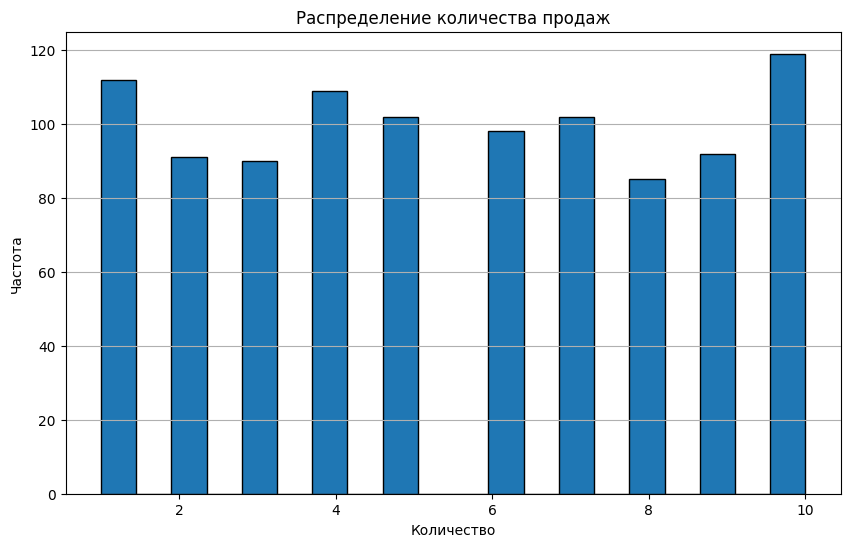

In [13]:
plt.figure(figsize = (10, 6))
plt.hist(market['quantity'], bins = 20, edgecolor = 'black')
plt.title('Распределение количества продаж')
plt.xlabel('Количество')
plt.ylabel('Частота')
plt.grid(axis = 'y')
plt.show()


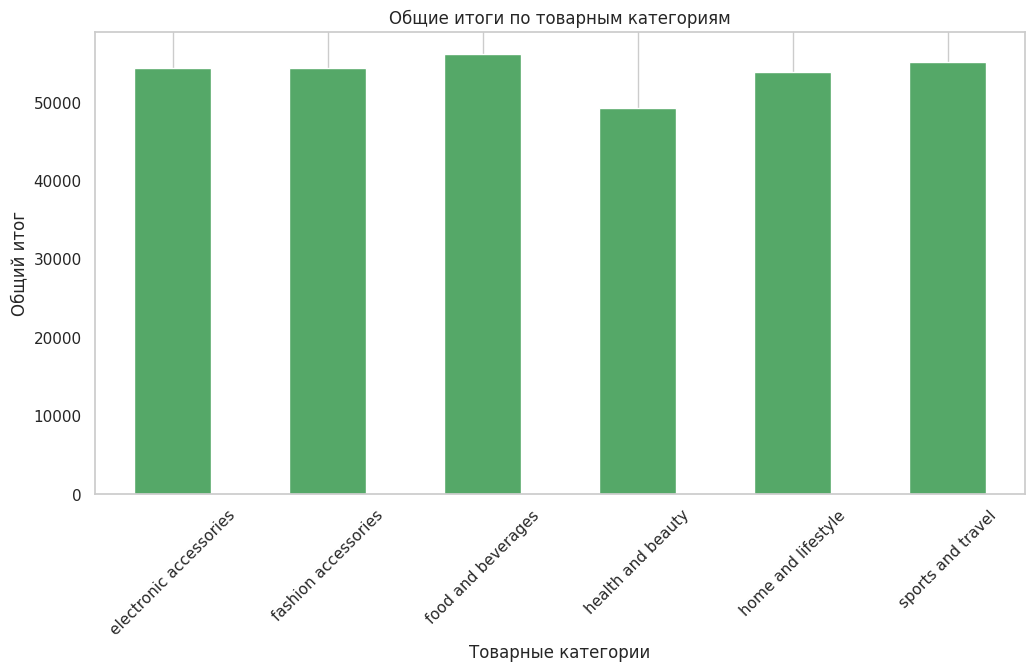

In [ ]:
plt.figure(figsize = (12, 6))
category_totals = market.groupby('product_line')['total'].sum()
category_totals.plot(kind = 'bar', color = 'g')
plt.title('Общие итоги по товарным категориям')
plt.xlabel('Товарные категории')
plt.ylabel('Общий итог')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()


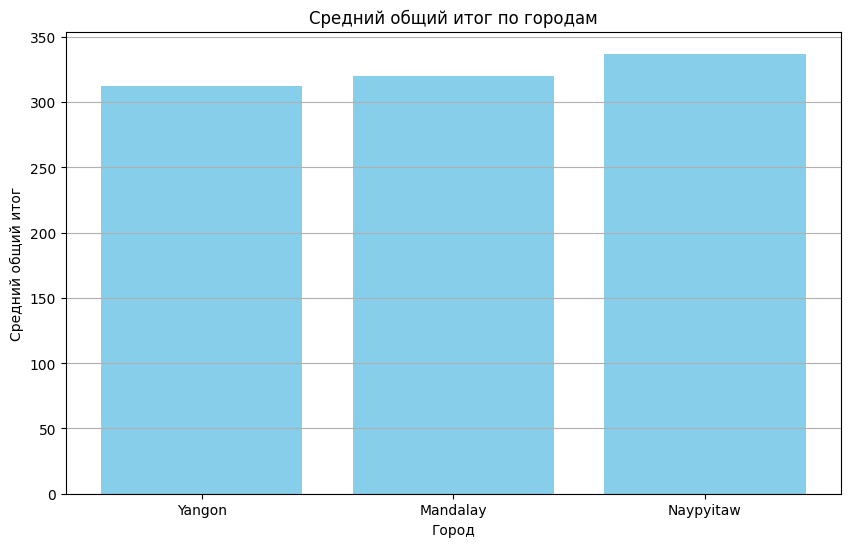

In [14]:
avg_city_tot = np.array([np.mean(market['total'][np.array(market['city']) == city]) for city in set(market['city'])])
cities = list(set(market['city']))
plt.figure(figsize=(10,6))
plt.bar(cities, avg_city_tot, color = 'skyblue')
plt.title('Средний общий итог по городам')
plt.xlabel('Город')
plt.ylabel('Средний общий итог')
plt.grid(axis = 'y')
plt.show()

## 2. Диаграммы, библиотека Seaborn

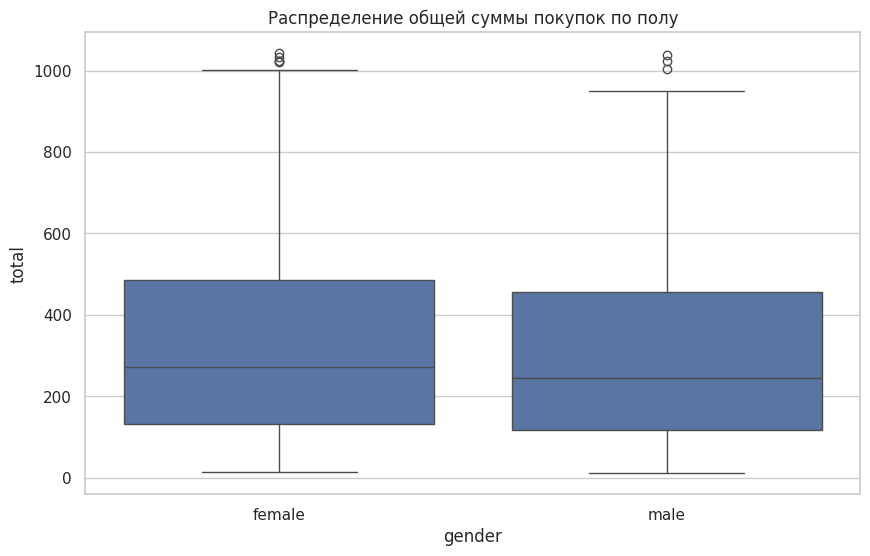

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'gender', y = 'total', data = market)
plt.title('Распределение общей суммы покупок по полу')
plt.show()

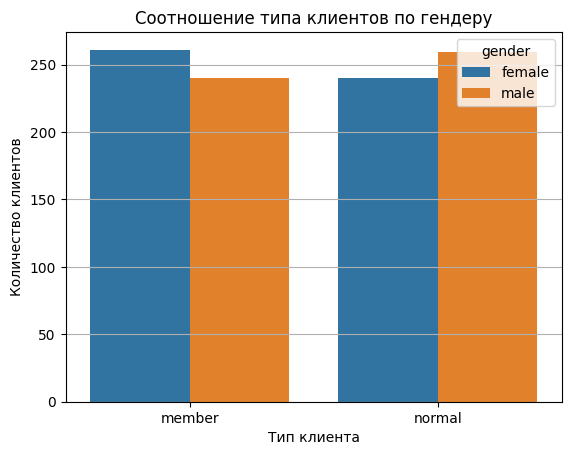

In [15]:
sns.countplot(x = 'customer_type', hue = 'gender', data = market)
plt.title('Соотношение типа клиентов по гендеру')
plt.xlabel('Тип клиента')
plt.ylabel('Количество клиентов')
plt.grid(axis = 'y')
plt.show()

## 3. "Портрет" типичного потребителя (вывод к разделу 3)

Типичный потребитель - это женщина, которая обладает картой магазина, которая проживает в Наургитаве, приобретает от 1 до 5 количество товара, чаще покупает товары из категории "продукты питания и напитки" или "дом и путешествия" и тратит на покупки больше, чем мужчины.

# Общий вывод по проекту

В результате данного проекта получилось глубже понять покупательское поведение и предпочтение клиентов. Стоит уделить внимание на то, чтобы клиенты, обладающие картой лояльности, приносили больше прибыли, чтобы для них было больше скидок. Также стоит обратить внимание на расположение магазин и делать скидки в праздничные дни. Анализ данных показал, какие товары наиболее популярны среди различных категорий покупателей. Визуализация, созданные в ходе работы над проект, также помогла и облегчила восприятие информации.
При реализации предложенных рекомендаций, компания сможет не только лучше ориентироваться на потребности покупателей, но и укрепить свою позицию на рынке, увеличивая прибыль и привлекая новых покупателей.
